In [ ]:
#!pip install xlrd==1.2.0
#!pip install --upgrade xlrd

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


список используемых ресурсов(для доработки проекта)
очистка датасета
https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27
scatter-matrix
https://www.kaggle.com/vijayprayagala/correlation-heat-map-and-scatter-matrix
регрессия
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9



In [ ]:
# место для кода
xl = pd.ExcelFile('/content/drive/MyDrive/data1.xls')
xl.sheet_names
df = xl.parse("data2018")
df=df.replace(' ', np.nan)
#df[0:217]
df=df.dropna(how='all')
df

,Country Name,Country Code,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,RESERVES,RATE,HCI
0,Afghanistan,AFG,1.194351e+08,8.333764e+10,1.840089,40.975606,8.260287,2.402431e+06,10334090.0,44.20343,8.206682e+09,NaN,0.393489
1,Albania,ALB,1.204383e+09,3.965339e+10,4.071301,45.263667,31.537380,2.641247e+07,1318022.0,66.99561,3.893560e+09,4.511767,0.628666
2,Algeria,DZA,1.466082e+09,4.962001e+11,1.400000,32.341022,25.623547,NaN,12173459.0,48.49803,8.738291e+10,0.412262,0.531994
3,American Samoa,ASM,NaN,NaN,2.184874,99.371069,68.867925,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,1.588765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,52142.0,NaN,NaN,NaN,NaN
213,West Bank and Gaza,PSE,2.106946e+08,2.647892e+10,0.905278,59.735630,19.865352,1.569027e+06,1214123.0,59.66608,5.378461e+08,5.970375,0.571729
214,"Yemen, Rep.",YEM,-2.820983e+08,NaN,0.752599,NaN,NaN,NaN,6545429.0,30.67289,NaN,NaN,0.372636
215,Zambia,ZMB,4.084385e+08,6.254688e+10,4.034812,35.983050,36.983166,3.500224e+07,7134980.0,65.71170,1.569230e+09,-0.407502,0.391176


In [ ]:
df.shape

(217, 13)

### 2
Выведите описание прочтенных данных.


In [ ]:
# примитивные статистики
df.describe()

,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,RESERVES,RATE,HCI
count,2.000000e+02,1.890000e+02,197.000000,176.000000,176.000000,1.530000e+02,1.860000e+02,190.000000,1.720000e+02,110.000000,167.000000
mean,5.911103e+09,6.641860e+11,3.140527,49.628199,43.608597,2.763490e+09,1.835155e+07,62.129076,7.233670e+10,6.174123,0.565468
std,4.236105e+10,2.362386e+12,3.073618,27.418962,31.293741,9.462673e+09,6.977836e+07,13.822027,2.774065e+11,7.446652,0.146535
min,-3.614674e+11,4.656769e+07,-19.607843,12.345638,2.740391,0.000000e+00,3.983300e+04,20.041460,4.368355e+07,-8.520138,0.299029
25%,1.072306e+08,2.012045e+10,1.792864,31.092065,24.171182,5.333010e+06,1.052598e+06,53.469163,9.339920e+08,2.294005,0.442008
50%,6.367095e+08,8.333764e+10,3.149198,44.206517,36.267632,5.075662e+07,4.112413e+06,61.704655,5.716163e+09,5.206009,0.564260
75%,3.044935e+09,3.592990e+11,4.741606,60.898503,53.885885,9.128239e+08,1.245910e+07,73.175267,4.067165e+10,8.332279,0.683645
max,2.614820e+11,2.173068e+13,15.132800,188.573085,211.559049,8.548230e+10,7.834241e+08,87.004520,3.168216e+12,44.437544,0.887084


### 2



In [ ]:
# размерности
print(df.shape)

(217, 13)


In [ ]:
print(df.dtypes)

Country Name     object
Country Code     object
FDI             float64
GDP_PPP         float64
GDP_GROWTH      float64
IMPORTS         float64
EXPORTS         float64
CHARGES         float64
LABOR_FORCE     float64
EDB             float64
RESERVES        float64
RATE            float64
HCI             float64
dtype: object


In [ ]:
# отбор числовых столбцов
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
numeric_cols

array(['FDI', 'GDP_PPP', 'GDP_GROWTH', 'IMPORTS', 'EXPORTS', 'CHARGES',
       'LABOR_FORCE', 'EDB', 'RESERVES', 'RATE', 'HCI'], dtype=object)

In [ ]:
# отбор нечисловых столбцов
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Country Name' 'Country Code']


<Axes: >

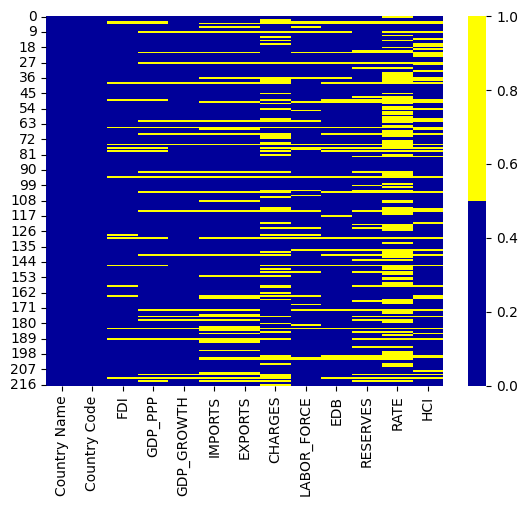

In [ ]:
cols = df.columns[:13] # первые 13 колонок
# определяем цвета
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
#список долей отсутствующих записей для каждого признака
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Country Name - 0%
Country Code - 0%
FDI - 8%
GDP_PPP - 13%
GDP_GROWTH - 9%
IMPORTS - 19%
EXPORTS - 19%
CHARGES - 29%
LABOR_FORCE - 14%
EDB - 12%
RESERVES - 21%
RATE - 49%
HCI - 23%


created missing indicator for: FDI
created missing indicator for: GDP_PPP
created missing indicator for: GDP_GROWTH
created missing indicator for: IMPORTS
created missing indicator for: EXPORTS
created missing indicator for: CHARGES
created missing indicator for: LABOR_FORCE
created missing indicator for: EDB
created missing indicator for: RESERVES
created missing indicator for: RATE
created missing indicator for: HCI


<Axes: xlabel='index'>

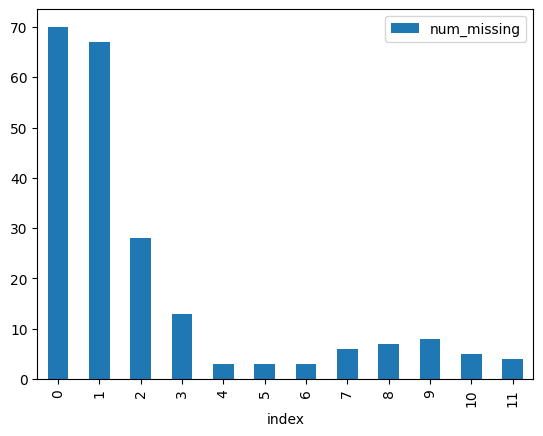

In [ ]:
# создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

# на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [ ]:
df

,Country Name,Country Code,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,...,GDP_GROWTH_ismissing,IMPORTS_ismissing,EXPORTS_ismissing,CHARGES_ismissing,LABOR_FORCE_ismissing,EDB_ismissing,RESERVES_ismissing,RATE_ismissing,HCI_ismissing,num_missing
0,Afghanistan,AFG,1.194351e+08,8.333764e+10,1.840089,40.975606,8.260287,2.402431e+06,10334090.0,44.20343,...,False,False,False,False,False,False,False,True,False,1
1,Albania,ALB,1.204383e+09,3.965339e+10,4.071301,45.263667,31.537380,2.641247e+07,1318022.0,66.99561,...,False,False,False,False,False,False,False,False,False,0
2,Algeria,DZA,1.466082e+09,4.962001e+11,1.400000,32.341022,25.623547,NaN,12173459.0,48.49803,...,False,False,False,True,False,False,False,False,False,1
3,American Samoa,ASM,NaN,NaN,2.184874,99.371069,68.867925,NaN,NaN,NaN,...,False,False,False,True,True,True,True,True,True,8
4,Andorra,AND,NaN,NaN,1.588765,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,NaN,52142.0,NaN,...,True,True,True,True,False,True,True,True,True,10
213,West Bank and Gaza,PSE,2.106946e+08,2.647892e+10,0.905278,59.735630,19.865352,1.569027e+06,1214123.0,59.66608,...,False,False,False,False,False,False,False,False,False,0
214,"Yemen, Rep.",YEM,-2.820983e+08,NaN,0.752599,NaN,NaN,NaN,6545429.0,30.67289,...,False,True,True,True,False,False,True,True,False,6
215,Zambia,ZMB,4.084385e+08,6.254688e+10,4.034812,35.983050,36.983166,3.500224e+07,7134980.0,65.71170,...,False,False,False,False,False,False,False,False,False,0


<Axes: >

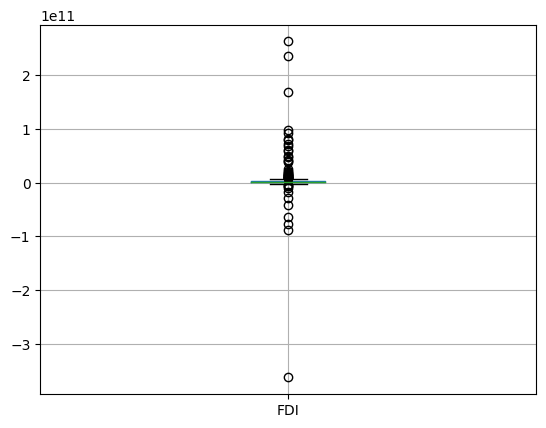

In [ ]:
df.boxplot(column=['FDI'])

<Axes: >

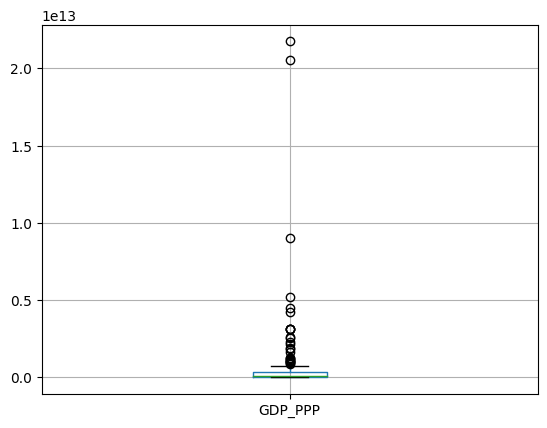

In [ ]:
df.boxplot(column=['GDP_PPP'])

<Axes: >

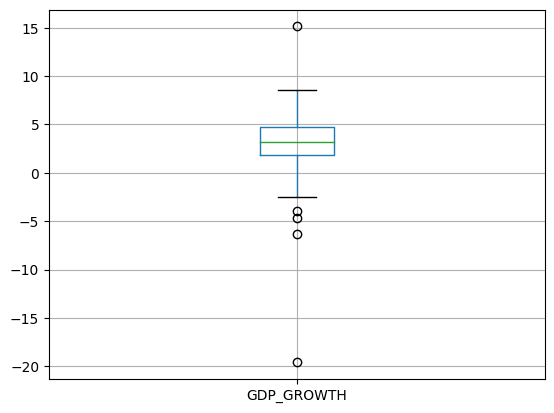

In [ ]:
df.boxplot(column=['GDP_GROWTH'])

<Axes: >

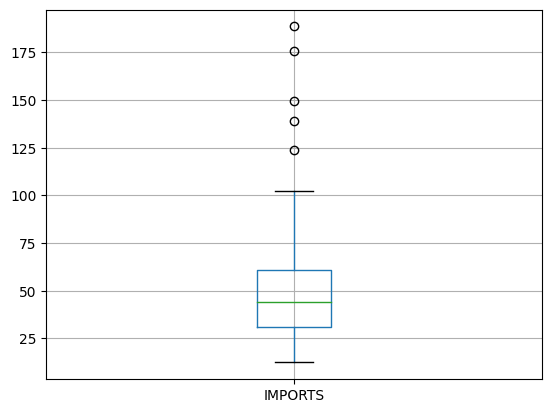

In [ ]:
df.boxplot(column=['IMPORTS'])

<Axes: >

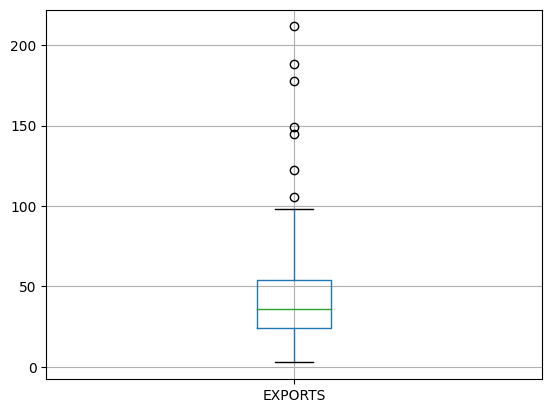

In [ ]:
df.boxplot(column=['EXPORTS'])

<Axes: >

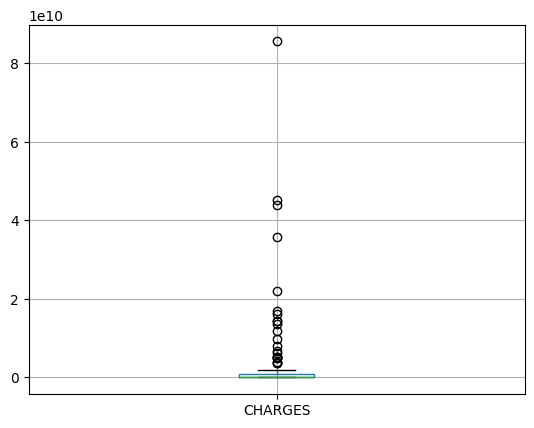

In [ ]:
df.boxplot(column=['CHARGES'])

<Axes: >

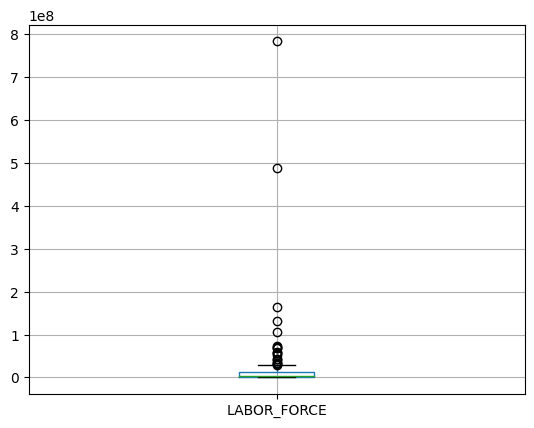

In [ ]:
df.boxplot(column=['LABOR_FORCE'])

<Axes: >

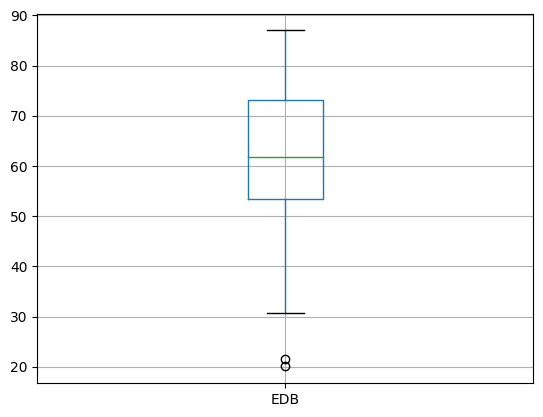

In [ ]:
df.boxplot(column=['EDB'])

<Axes: >

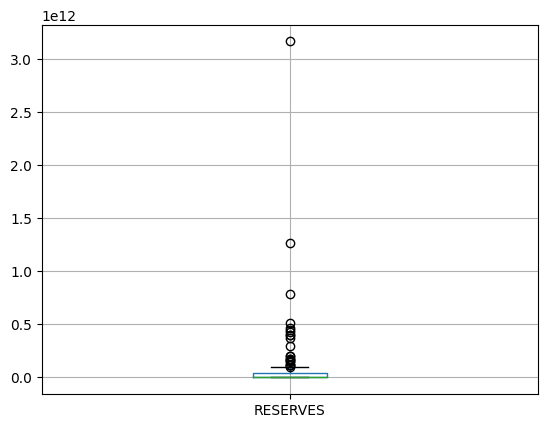

In [ ]:
df.boxplot(column=['RESERVES'])

<Axes: >

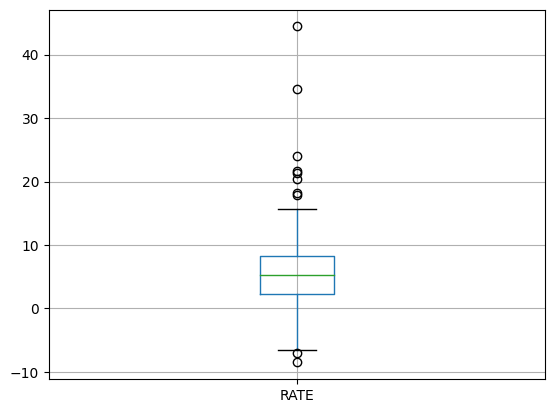

In [ ]:
df.boxplot(column=['RATE'])

<Axes: >

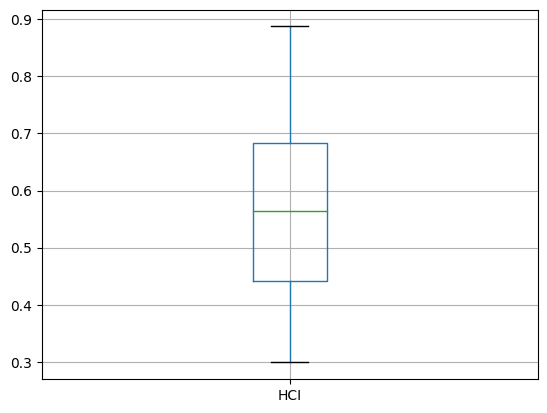

In [ ]:
df.boxplot(column=['HCI'])

array([[<Axes: xlabel='FDI', ylabel='FDI'>,
        <Axes: xlabel='GDP_PPP', ylabel='FDI'>,
        <Axes: xlabel='GDP_GROWTH', ylabel='FDI'>,
        <Axes: xlabel='IMPORTS', ylabel='FDI'>,
        <Axes: xlabel='EXPORTS', ylabel='FDI'>,
        <Axes: xlabel='CHARGES', ylabel='FDI'>,
        <Axes: xlabel='LABOR_FORCE', ylabel='FDI'>,
        <Axes: xlabel='EDB', ylabel='FDI'>],
       [<Axes: xlabel='FDI', ylabel='GDP_PPP'>,
        <Axes: xlabel='GDP_PPP', ylabel='GDP_PPP'>,
        <Axes: xlabel='GDP_GROWTH', ylabel='GDP_PPP'>,
        <Axes: xlabel='IMPORTS', ylabel='GDP_PPP'>,
        <Axes: xlabel='EXPORTS', ylabel='GDP_PPP'>,
        <Axes: xlabel='CHARGES', ylabel='GDP_PPP'>,
        <Axes: xlabel='LABOR_FORCE', ylabel='GDP_PPP'>,
        <Axes: xlabel='EDB', ylabel='GDP_PPP'>],
       [<Axes: xlabel='FDI', ylabel='GDP_GROWTH'>,
        <Axes: xlabel='GDP_PPP', ylabel='GDP_GROWTH'>,
        <Axes: xlabel='GDP_GROWTH', ylabel='GDP_GROWTH'>,
        <Axes: xlabel='IMPORTS', yla

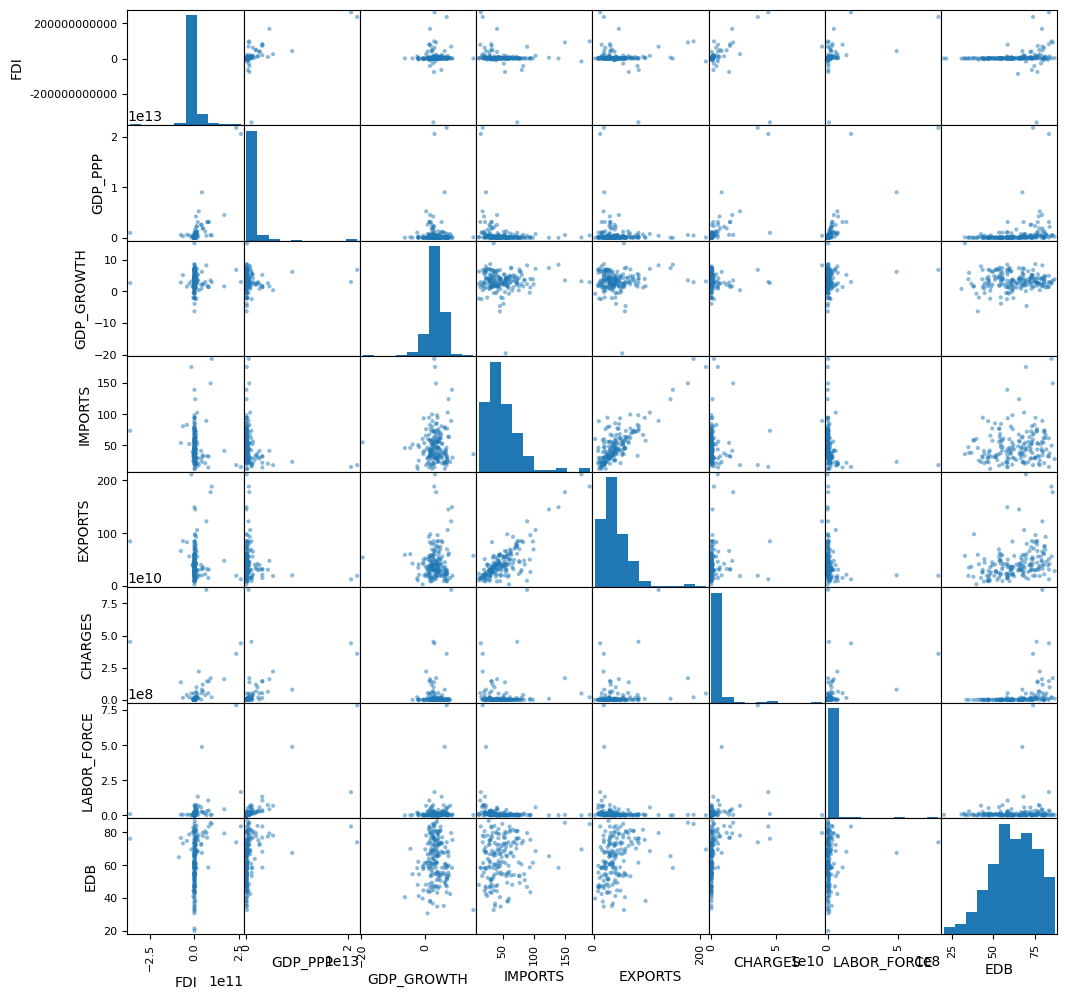

In [ ]:
from pandas.plotting import scatter_matrix
#scatter_matrix(df[2:3],figsize=[20,20])
attr=list(df.columns[2:10])
attr
df1=df.loc[:,attr]
df1
pd.plotting.scatter_matrix(df1,figsize=(12,12))

In [ ]:
# описательные статистики
df.describe()

,FDI,GDP_PPP,GDP_GROWTH,IMPORTS,EXPORTS,CHARGES,LABOR_FORCE,EDB,RESERVES,RATE,HCI,num_missing
count,2.000000e+02,1.890000e+02,197.000000,176.000000,176.000000,1.530000e+02,1.860000e+02,190.000000,1.720000e+02,110.000000,167.000000,217.000000
mean,5.911103e+09,6.641860e+11,3.140527,49.628199,43.608597,2.763490e+09,1.835155e+07,62.129076,7.233670e+10,6.174123,0.565468,2.170507
std,4.236105e+10,2.362386e+12,3.073618,27.418962,31.293741,9.462673e+09,6.977836e+07,13.822027,2.774065e+11,7.446652,0.146535,2.949177
min,-3.614674e+11,4.656769e+07,-19.607843,12.345638,2.740391,0.000000e+00,3.983300e+04,20.041460,4.368355e+07,-8.520138,0.299029,0.000000
25%,1.072306e+08,2.012045e+10,1.792864,31.092065,24.171182,5.333010e+06,1.052598e+06,53.469163,9.339920e+08,2.294005,0.442008,0.000000
50%,6.367095e+08,8.333764e+10,3.149198,44.206517,36.267632,5.075662e+07,4.112413e+06,61.704655,5.716163e+09,5.206009,0.564260,1.000000
75%,3.044935e+09,3.592990e+11,4.741606,60.898503,53.885885,9.128239e+08,1.245910e+07,73.175267,4.067165e+10,8.332279,0.683645,2.000000
max,2.614820e+11,2.173068e+13,15.132800,188.573085,211.559049,8.548230e+10,7.834241e+08,87.004520,3.168216e+12,44.437544,0.887084,11.000000


In [ ]:
#Корреляция между переменными
import matplotlib.pyplot as plt
def plot_corr_matrix(data_basic,attr,fig_no, method):
    correlations=data_basic.corr(method=method)
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    plt.show()

<ipython-input-28-1ac458b5b51e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+attr)
<ipython-input-28-1ac458b5b51e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+attr)


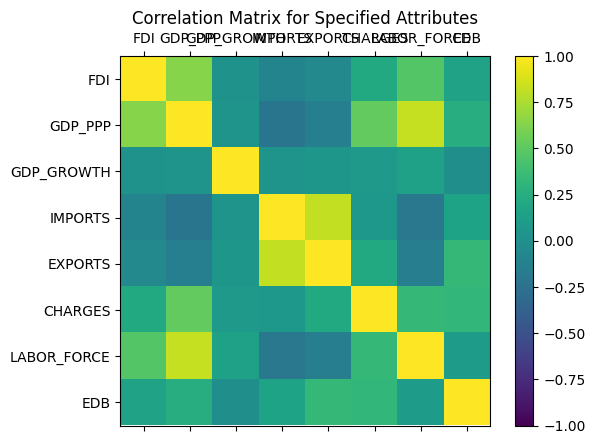

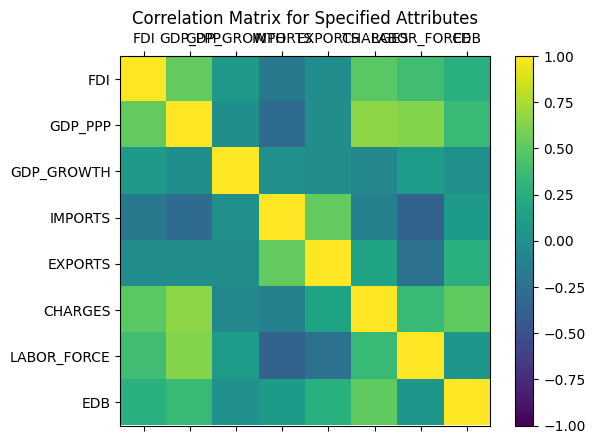

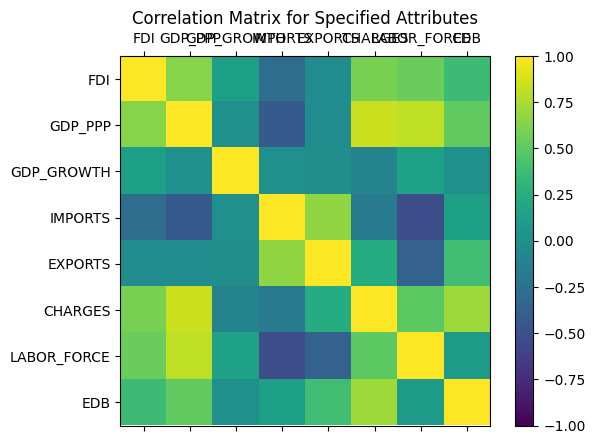

In [ ]:
plot_corr_matrix(df1,attr,2, 'pearson')
plot_corr_matrix(df1,attr,2, 'kendall')
plot_corr_matrix(df1,attr,2, 'spearman')

#correlations=df1.corr(method='pearson')
#correlations

In [ ]:
import statsmodels.api as sm

In [ ]:
df=df.fillna(df.mean())
feature_names={'GDP_PPP'}
target_name={'FDI'}

<ipython-input-31-c1f7e1f2d4bc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [ ]:
df=df.fillna(df.mean())
feature_names={'GDP_PPP', 'GDP_GROWTH', 'IMPORTS', 'EXPORTS', 'CHARGES',
       'LABOR_FORCE', 'EDB', 'RESERVES', 'RATE', 'HCI'}

target_name={'FDI'}

<ipython-input-32-0b6a2e3d5ccd>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [ ]:
X = df[feature_names]
y = df[target_name]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<ipython-input-33-6812ce389b39>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[feature_names]
<ipython-input-33-6812ce389b39>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y = df[target_name]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    FDI   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.416
Method:                 Least Squares   F-statistic:                              16.44
Date:                Sun, 03 Mar 2024   Prob (F-statistic):                    1.11e-21
Time:                        07:55:18   Log-Likelihood:                         -5547.2
No. Observations:                 217   AIC:                                  1.111e+04
Df Residuals:                     207   BIC:                                  1.115e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
RESERVES        0.0036      0.016      0.224      0.823      -0.028       0.035
CHARGES        -1.0331      0.338     -3.058      0.003      -1.699      -0.367
EXPORTS      1.044e+08   1.42e+08      0.736      0.463   -1.75e+08    3.84e+08
RATE         2.798e+08   3.98e+08      0.703      0.483   -5.04e+08    1.06e+09
HCI         -2.005e+10   2.51e+10     -0.800      0.425   -6.95e+10    2.94e+10
GDP_PPP         0.0176      0.002      8.575      0.000       0.014       0.022
IMPORTS      3.488e+07   1.46e+08      0.239      0.811   -2.53e+08    3.23e+08
LABOR_FORCE  -165.7513     71.043     -2.333      0.021    -305.812     -25.690
EDB          4.446e+07   2.24e+08      0.199      0.843   -3.96e+08    4.85e+08
GDP_GROWTH   2.217e+08    7.4e+08      0.300      0.765   -1.24e+09    1.68e+09
==============================================================================
Omnibus:                      280.484   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39116.967
Skew:                          -5.161   Prob(JB):                         0.00
Kurtosis:                      67.960   Cond. No.                     2.72e+13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.72e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
X = df[feature_names]
y = df[target_name]
print(X, y)

In [ ]:
#split data

In [ ]:
model = Lasso(alpha=0.1, random_state=241)
model.fit(X, y)

In [ ]:
model.coef_

In [ ]:
y_pred = model.predict(X)
#print(y_pred)

In [ ]:
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X.index,y = y_pred.squeeze(),mode='lines',name='y_hat'))
fig.add_trace(go.Scatter(x=X.index,y = y.squeeze(),mode='lines',name='y_fact'))
#fig.update_layout(title=f"MAPE: {mapes[-1]}%")
#figures.append(fig)
fig.show()


In [ ]:
model1 = Ridge(alpha=0.1, random_state=241)
model1.fit(X, y)
y_pred = model1.predict(X)

In [ ]:
model.coef_

In [ ]:
#0.001
model1.coef_

In [ ]:
#1000
model1.coef_

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X.index,y = y_pred.squeeze(),mode='lines',name='y_hat'))
fig.add_trace(go.Scatter(x=X.index,y = y.squeeze(),mode='lines',name='y_fact'))
#fig.update_layout(title=f"MAPE: {mapes[-1]}%")
#figures.append(fig)
fig.show()

In [ ]:
print("Ridge coefs: ", model1.coef_)
print("Lasso coefs: ", model.coef_)

In [ ]:
print(type(np.array(y.values)))
print(type(y_pred))
np_pred = np.array(y.values).reshape(-1)
print(np_pred.shape)
print(y_pred.shape)
print(np.diff(y_pred - np.array(y.values)).shape)
print(np.diff(y_pred - np.array(y.values)))

In [ ]:
import math
def regression_model(name, X, y, alpha):
  if name == 'Ridge':
    model = Ridge(alpha=alpha, random_state=241)
  else:
    model = Lasso(alpha=alpha, random_state=241)
  model.fit(X, y)
  y_pred = model.predict(X)

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=X.index,y = y_pred.squeeze(),mode='lines',name='y_hat'))
  fig.add_trace(go.Scatter(x=X.index,y = y.squeeze(),mode='lines',name='y_fact'))
  error = 0
  for i in range(len(y_pred)):
    error += (y_pred[i] - y.iloc[i])*(y_pred[i] - y.iloc[i])
  return model, y_pred, fig, math.sqrt(error)/ len(y_pred)


In [ ]:
for alpha in [0.1, 1, 10, 100, 1000]:
  model, y_pred, fig, err = regression_model('Ridge', X, y, alpha)
  fig.update_layout(title=f"ERR: {err}")
  fig.show()
  print(err)



In [ ]:
print(X.columns)
print(list(X.median()))
print(y.median())
for alpha in [0.1, 1, 10, 100, 1000]:
  model, y_pred, fig = regression_model('Ridge', X, y, alpha)

  #print(model.coef_)
  print([model.coef_[0][i]*list(X.median())[i] for i in range(9)])


In [ ]:
for alpha in [0.1, 1, 10, 100, 1000]:
  model, y_pred, fig = regression_model('Lasso', X, y, alpha)

  print(model.coef_)
  #print([model.coef_[i]*list(X.median())[i] for i in range(9)])